In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

maze = gym.make('Woods1-v0')
print("This is how maze looks like:")
situation = maze.reset()
maze.render()


This is how maze looks like:

□ □ □ □ □
□ □ □ □ X
■ ■ $ □ □
■ ■ ■ □ □
■ ■ ■ □ □


In [3]:
from lcs.agents.xncs import XNCS, Configuration
from utils.nxcs_utils import *


In [4]:
cfg = Configuration(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    mutation_chance=0.08,
                    chi=0.8,
                    ga_threshold=25,
                    deletion_threshold=25,
                    delta=0.1,
                    initial_error=0.01,
                    epsilon_0=0.01,
                    metrics_trial_frequency=50,
                    covering_wildcard_chance = 0.9,
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=200
                   )


In [5]:
agent = XNCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)
explore_population, exploit_metrics = agent.exploit(maze, 1000)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 24, 'reward': 1000.0, 'perf_time': 0.01964560000000004, 'numerosity': 83, 'population': 83, 'average_specificity': 2.0843373493975905, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 16, 'reward': 1004.2204271968708, 'perf_time': 0.12402200000000008, 'numerosity': 1348, 'population': 812, 'average_specificity': 18.11053412462908, 'fraction_accuracy': 0.12535714285714286}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 7, 'reward': 1107.3640216671884, 'perf_time': 0.10553249999999892, 'numerosity': 1800, 'population': 1154, 'average_specificity': 14.893888888888888, 'fraction_accuracy': 0.6790994331755201}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 7, 'reward': 1107.3653099850317, 'perf_time': 0.08541469999999407, 'numerosity': 1800, 'population': 1151, 'average_specificity': 15.722222222222221, 'fraction_accuracy': 0.36458333333333337}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_

In [6]:
for cl in explore_population:
        print(str(cl))

Cond:..#O.##O - Act:7 - effect:OO.O.O.O - Num:1 [fit: 0.011, exp: 0.00, pred: 486.429, error:0.0]acc: None
Cond:#O#F..## - Act:0 - effect:......O. - Num:1 [fit: 0.006, exp: 0.00, pred: 675.531, error:787.1840290737638]acc: None
Cond:.#..FOF. - Act:3 - effect:.....FF. - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000, error:0.01]acc: None
Cond:##O##.#O - Act:1 - effect:......O. - Num:1 [fit: 0.005, exp: 0.00, pred: 798.521, error:747.3180357670524]acc: None
Cond:.OOO#..F - Act:6 - effect:....O... - Num:1 [fit: 0.006, exp: 0.00, pred: 968.714, error:960.9493884141996]acc: None
Cond:##..O... - Act:0 - effect:.....OO. - Num:1 [fit: 0.002, exp: 0.00, pred: 1317.461, error:620.428793052614]acc: None
Cond:##.O#O.. - Act:6 - effect:.O..O... - Num:1 [fit: 0.002, exp: 0.00, pred: 868.895, error:742.4956394789167]acc: None
Cond:.#.#O#O. - Act:3 - effect:.O...O.F - Num:2 [fit: 0.004, exp: 0.00, pred: 1290.917, error:498.0350006750616]acc: None
Cond:.#OO#O.# - Act:5 - effect:........ - Num:1 [fit: 0.014,

In [7]:
print("Most Numerous rules:")
for action in range(agent.cfg.number_of_actions):
    action_set = agent.population.generate_action_set(action)
    most_numerous = action_set[0]
    for cl in action_set:
        if cl.numerosity > most_numerous.numerosity:
            most_numerous = cl
    print(most_numerous)

Most Numerous rules:
Cond:...#O### - Act:0 - effect:...OO... - Num:8 [fit: 0.280, exp: 32.00, pred: 1145.166, error:5615.340915401308]acc: 0.75
Cond:.....O#. - Act:1 - effect:.O...... - Num:3 [fit: 0.002, exp: 22.00, pred: 926.395, error:9731.598541633895]acc: 0.13636363636363635
Cond:.O#O#.#. - Act:2 - effect:.OOO.... - Num:5 [fit: 0.025, exp: 15.00, pred: 945.849, error:8328.366070324544]acc: 0.26666666666666666
Cond:...#OO.# - Act:3 - effect:....OOO. - Num:12 [fit: 0.280, exp: 144.00, pred: 1158.783, error:143.7059003841303]acc: 1.0
Cond:#.#.#O.. - Act:4 - effect:....OOO. - Num:11 [fit: 0.437, exp: 216.00, pred: 1810.484, error:304.5103933539941]acc: 1.0
Cond:.....#.. - Act:5 - effect:....OOO. - Num:19 [fit: 1.365, exp: 354.00, pred: 1227.238, error:250.16480376297162]acc: 1.0
Cond:.####.O# - Act:6 - effect:......OO - Num:3 [fit: 0.013, exp: 27.00, pred: 979.212, error:3316.023485212587]acc: 0.8148148148148148
Cond:#..#OO#. - Act:7 - effect:...O.... - Num:9 [fit: 0.035, exp: 49.00, 

In [8]:
print("The most numerous rules:")
numerous =  sorted(agent.population, key=lambda cl: -1 * cl.numerosity)[0:10]
for cl in numerous:
    print(cl)

The most numerous rules:
Cond:.....#.. - Act:5 - effect:....OOO. - Num:19 [fit: 1.365, exp: 354.00, pred: 1227.238, error:250.16480376297162]acc: 1.0
Cond:...#OO.# - Act:3 - effect:....OOO. - Num:12 [fit: 0.280, exp: 144.00, pred: 1158.783, error:143.7059003841303]acc: 1.0
Cond:#.#.#O.. - Act:4 - effect:....OOO. - Num:11 [fit: 0.437, exp: 216.00, pred: 1810.484, error:304.5103933539941]acc: 1.0
Cond:.#...#.. - Act:5 - effect:....OOO. - Num:10 [fit: 0.692, exp: 417.00, pred: 1225.169, error:248.2805850823554]acc: 0.9256594724220624
Cond:#...#O.. - Act:4 - effect:....OOO. - Num:9 [fit: 0.342, exp: 271.00, pred: 1810.484, error:304.5103933539941]acc: 1.0
Cond:#..#OO#. - Act:7 - effect:...O.... - Num:9 [fit: 0.035, exp: 49.00, pred: 1135.014, error:1622.4503549176839]acc: 0.7551020408163265
Cond:...#O### - Act:0 - effect:...OO... - Num:8 [fit: 0.280, exp: 32.00, pred: 1145.166, error:5615.340915401308]acc: 0.75
Cond:.O.#...# - Act:3 - effect:..OO.... - Num:8 [fit: 0.083, exp: 37.00, pred: 

In [9]:
print("The fittest rules:")
fittest =  sorted(agent.population, key=lambda cl: -1 * cl.fitness)[0:10]
for cl in fittest:
    print(cl)

The fittest rules:
Cond:.....#.. - Act:5 - effect:....OOO. - Num:19 [fit: 1.365, exp: 354.00, pred: 1227.238, error:250.16480376297162]acc: 1.0
Cond:####.#F# - Act:3 - effect:......OO - Num:2 [fit: 1.201, exp: 6.00, pred: 1010.698, error:2438.439663305213]acc: 0.8333333333333334
Cond:#OO..#.. - Act:1 - effect:.OO..... - Num:1 [fit: 0.809, exp: 10.00, pred: 1009.578, error:2542.189272565551]acc: 0.9
Cond:.#...#.. - Act:5 - effect:....OOO. - Num:10 [fit: 0.692, exp: 417.00, pred: 1225.169, error:248.2805850823554]acc: 0.9256594724220624
Cond:#######. - Act:5 - effect:.....F.. - Num:2 [fit: 0.690, exp: 4.00, pred: 1415.929, error:126.99893216917172]acc: 1.0
Cond:#.#..#.. - Act:4 - effect:.....OOF - Num:2 [fit: 0.581, exp: 5.00, pred: 1334.415, error:217.55695457350893]acc: 1.0
Cond:#.###OO# - Act:7 - effect:....OOO. - Num:3 [fit: 0.567, exp: 7.00, pred: 1285.887, error:141.34880202689266]acc: 1.0
Cond:..#.#.## - Act:4 - effect:....FO.. - Num:2 [fit: 0.518, exp: 10.00, pred: 1119.882, erro

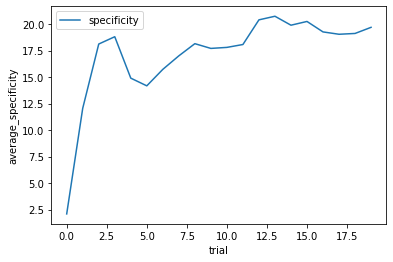

In [10]:
import pandas as pd
import numpy as np

df = pd.DataFrame(metric["average_specificity"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])

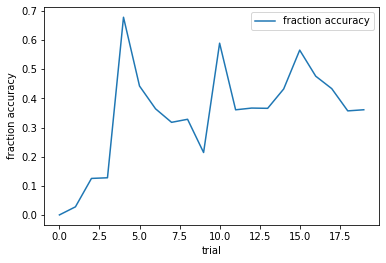

In [11]:
df = pd.DataFrame(metric["fraction_accuracy"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])

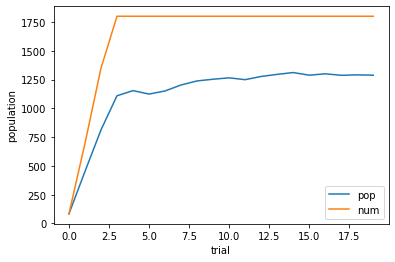

In [12]:
df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

steps_averaged = []

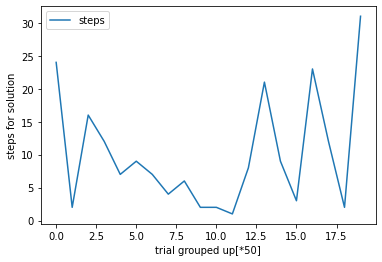

In [13]:
xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
# df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial grouped up[*50]")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
